# Emergency Detection Model Training - Simplified
## Large Events Emergency Management System

This notebook trains ML models for detecting emergencies using Google Colab's GPU resources.


In [1]:
# Install required packages
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn opencv-python pillow joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import warnings
warnings.filterwarnings('ignore')

# TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

Libraries imported successfully!
TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Generate synthetic training data
def generate_fire_data(num_samples=2000):
    """Generate synthetic fire detection data"""
    data = []
    labels = []

    for i in range(num_samples):
        if i < num_samples // 2:
            # Fire images - higher red/orange values
            red_intensity = np.random.normal(200, 30)
            orange_intensity = np.random.normal(180, 25)
            brightness = np.random.normal(150, 20)
            motion_intensity = np.random.normal(80, 15)
            label = 1  # Fire
        else:
            # Non-fire images
            red_intensity = np.random.normal(100, 40)
            orange_intensity = np.random.normal(90, 35)
            brightness = np.random.normal(120, 30)
            motion_intensity = np.random.normal(30, 20)
            label = 0  # No fire

        features = [red_intensity, orange_intensity, brightness, motion_intensity,
                   np.random.normal(50, 10), np.random.normal(75, 15)]
        data.append(features)
        labels.append(label)

    return np.array(data), np.array(labels)

def generate_crowd_data(num_samples=2000):
    """Generate synthetic crowd density data"""
    data = []
    labels = []

    for i in range(num_samples):
        people_count = np.random.randint(0, 200)
        area_coverage = np.random.uniform(0.1, 0.9)
        movement_speed = np.random.uniform(0, 5)
        noise_level = np.random.uniform(40, 100)

        density = people_count * area_coverage / 100
        if density < 1.0:
            density_level = 0  # Low
        elif density < 2.5:
            density_level = 1  # Medium
        elif density < 4.0:
            density_level = 2  # High
        else:
            density_level = 3  # Critical

        features = [people_count, area_coverage, movement_speed, noise_level, density]
        data.append(features)
        labels.append(density_level)

    return np.array(data), np.array(labels)

def generate_behavior_data(num_samples=2000):
    """Generate synthetic behavior analysis data"""
    data = []
    labels = []

    behavior_types = ['normal', 'suspicious', 'aggressive', 'panic']

    for i in range(num_samples):
        behavior = np.random.choice(behavior_types)

        if behavior == 'normal':
            motion_variance = np.random.normal(10, 3)
            audio_level = np.random.normal(60, 10)
            speed_changes = np.random.normal(2, 1)
        elif behavior == 'suspicious':
            motion_variance = np.random.normal(25, 5)
            audio_level = np.random.normal(50, 8)
            speed_changes = np.random.normal(8, 2)
        elif behavior == 'aggressive':
            motion_variance = np.random.normal(40, 8)
            audio_level = np.random.normal(85, 15)
            speed_changes = np.random.normal(15, 3)
        else:  # panic
            motion_variance = np.random.normal(60, 10)
            audio_level = np.random.normal(95, 20)
            speed_changes = np.random.normal(25, 5)

        features = [motion_variance, audio_level, speed_changes,
                   np.random.normal(30, 10), np.random.normal(45, 12)]
        data.append(features)
        labels.append(behavior)

    return np.array(data), np.array(labels)

# Generate datasets
print("Generating synthetic training data...")
fire_data, fire_labels = generate_fire_data(2000)
crowd_data, crowd_labels = generate_crowd_data(2000)
behavior_data, behavior_labels = generate_behavior_data(2000)

print(f"Fire detection data: {fire_data.shape}")
print(f"Crowd analysis data: {crowd_data.shape}")
print(f"Behavior analysis data: {behavior_data.shape}")
print("✅ Data generation complete!")

Generating synthetic training data...
Fire detection data: (2000, 6)
Crowd analysis data: (2000, 5)
Behavior analysis data: (2000, 5)
✅ Data generation complete!


In [3]:
# Train Fire Detection Model
print("🔥 Training Fire Detection Model...")

X_fire_train, X_fire_test, y_fire_train, y_fire_test = train_test_split(
    fire_data, fire_labels, test_size=0.2, random_state=42, stratify=fire_labels
)

fire_scaler = StandardScaler()
X_fire_train_scaled = fire_scaler.fit_transform(X_fire_train)
X_fire_test_scaled = fire_scaler.transform(X_fire_test)

fire_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_fire_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

fire_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fire_history = fire_model.fit(
    X_fire_train_scaled, y_fire_train,
    validation_data=(X_fire_test_scaled, y_fire_test),
    epochs=30, batch_size=32, verbose=1
)

fire_predictions = (fire_model.predict(X_fire_test_scaled) > 0.5).astype(int)
fire_accuracy = accuracy_score(y_fire_test, fire_predictions)

print(f"🔥 Fire Detection Accuracy: {fire_accuracy:.4f}")
fire_model.save('/content/fire_detection_model.h5')
joblib.dump(fire_scaler, '/content/fire_scaler.pkl')
print("✅ Fire detection model saved!")

🔥 Training Fire Detection Model...
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8629 - loss: 0.4345 - val_accuracy: 0.9950 - val_loss: 0.0286
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9874 - loss: 0.0536 - val_accuracy: 0.9975 - val_loss: 0.0159
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9951 - loss: 0.0201 - val_accuracy: 0.9975 - val_loss: 0.0110
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0233 - val_accuracy: 0.9975 - val_loss: 0.0146
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accuracy: 0.9975 - val_loss: 0.0118
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9943 - loss: 0.0224 - val_accuracy: 0.9950 - val_loss: 0.0141
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9982 - loss: 0.0142 - val_accuracy: 0.9950 - val_loss: 0.0150
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9926 - loss: 0.

🔥 Fire Detection Accuracy: 0.9950
✅ Fire detection model saved!


In [4]:
# Train Crowd Density Model
print("👥 Training Crowd Density Model...")

X_crowd_train, X_crowd_test, y_crowd_train, y_crowd_test = train_test_split(
    crowd_data, crowd_labels, test_size=0.2, random_state=42, stratify=crowd_labels
)

crowd_scaler = StandardScaler()
X_crowd_train_scaled = crowd_scaler.fit_transform(X_crowd_train)
X_crowd_test_scaled = crowd_scaler.transform(X_crowd_test)

num_classes = len(np.unique(crowd_labels))
crowd_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_crowd_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

crowd_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

crowd_history = crowd_model.fit(
    X_crowd_train_scaled, y_crowd_train,
    validation_data=(X_crowd_test_scaled, y_crowd_test),
    epochs=30, batch_size=32, verbose=1
)

crowd_predictions = np.argmax(crowd_model.predict(X_crowd_test_scaled), axis=1)
crowd_accuracy = accuracy_score(y_crowd_test, crowd_predictions)

print(f"👥 Crowd Density Accuracy: {crowd_accuracy:.4f}")
crowd_model.save('/content/crowd_density_model.h5')
joblib.dump(crowd_scaler, '/content/crowd_scaler.pkl')
print("✅ Crowd density model saved!")

👥 Training Crowd Density Model...
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.5952 - loss: 0.6149 - val_accuracy: 0.9425 - val_loss: 0.1630
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9443 - loss: 0.1498 - val_accuracy: 0.9675 - val_loss: 0.0772
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9561 - loss: 0.0988 - val_accuracy: 0.9700 - val_loss: 0.0639
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9602 - loss: 0.0944 - val_accuracy: 0.9700 - val_loss: 0.0659
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9545 - loss: 0.0954 - val_accuracy: 0.9750 - val_loss: 0.0566
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9667 - loss: 0.0687 - val_accuracy: 0.9800 - val_loss: 0.0475
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9638 - loss: 0.0778 - val_accuracy: 0.9775 - val_loss: 0.0516
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9676 - loss: 0.0716

👥 Crowd Density Accuracy: 0.9925
✅ Crowd density model saved!


In [5]:
# Train Behavior Analysis Model
print("🚨 Training Behavior Analysis Model...")

behavior_encoder = LabelEncoder()
behavior_labels_encoded = behavior_encoder.fit_transform(behavior_labels)

X_behavior_train, X_behavior_test, y_behavior_train, y_behavior_test = train_test_split(
    behavior_data, behavior_labels_encoded, test_size=0.2, random_state=42, stratify=behavior_labels_encoded
)

behavior_scaler = StandardScaler()
X_behavior_train_scaled = behavior_scaler.fit_transform(X_behavior_train)
X_behavior_test_scaled = behavior_scaler.transform(X_behavior_test)

behavior_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
behavior_model.fit(X_behavior_train_scaled, y_behavior_train)

behavior_predictions = behavior_model.predict(X_behavior_test_scaled)
behavior_accuracy = accuracy_score(y_behavior_test, behavior_predictions)

print(f"🚨 Behavior Analysis Accuracy: {behavior_accuracy:.4f}")
joblib.dump(behavior_model, '/content/behavior_analysis_model.pkl')
joblib.dump(behavior_encoder, '/content/behavior_label_encoder.pkl')
joblib.dump(behavior_scaler, '/content/behavior_scaler.pkl')
print("✅ Behavior analysis model saved!")

🚨 Training Behavior Analysis Model...
🚨 Behavior Analysis Accuracy: 0.9575
✅ Behavior analysis model saved!


In [6]:
# Train Sensor Anomaly Detection Models
print("📊 Training Sensor Anomaly Detection Models...")

def generate_sensor_data(num_samples=2000):
    data = []
    for i in range(num_samples):
        if i < num_samples * 0.9:  # Normal readings
            temperature = np.random.normal(22, 3)
            humidity = np.random.normal(45, 8)
            sound = np.random.normal(65, 10)
            motion = np.random.normal(20, 5)
        else:  # Anomalous readings
            temperature = np.random.choice([np.random.normal(45, 5), np.random.normal(-5, 2)])
            humidity = np.random.normal(85, 10)
            sound = np.random.normal(110, 15)
            motion = np.random.normal(80, 20)
        data.append([temperature, humidity, sound, motion])
    return np.array(data)

sensor_data = generate_sensor_data(2000)
sensor_types = ['temperature', 'humidity', 'sound', 'motion']

for i, sensor_type in enumerate(sensor_types):
    print(f"Training {sensor_type} anomaly detector...")

    sensor_values = sensor_data[:, i].reshape(-1, 1)
    normal_data = sensor_values[:int(len(sensor_values) * 0.9)]

    scaler = StandardScaler()
    normal_data_scaled = scaler.fit_transform(normal_data)

    anomaly_model = IsolationForest(contamination=0.1, random_state=42)
    anomaly_model.fit(normal_data_scaled)

    # Test accuracy
    all_data_scaled = scaler.transform(sensor_values)
    predictions = anomaly_model.predict(all_data_scaled)

    joblib.dump(anomaly_model, f'/content/{sensor_type}_anomaly_model.pkl')
    joblib.dump(scaler, f'/content/{sensor_type}_scaler.pkl')

    print(f"✅ {sensor_type} anomaly detector saved!")

print("📊 All sensor anomaly models trained!")

📊 Training Sensor Anomaly Detection Models...
Training temperature anomaly detector...
✅ temperature anomaly detector saved!
Training humidity anomaly detector...
✅ humidity anomaly detector saved!
Training sound anomaly detector...
✅ sound anomaly detector saved!
Training motion anomaly detector...
✅ motion anomaly detector saved!
📊 All sensor anomaly models trained!


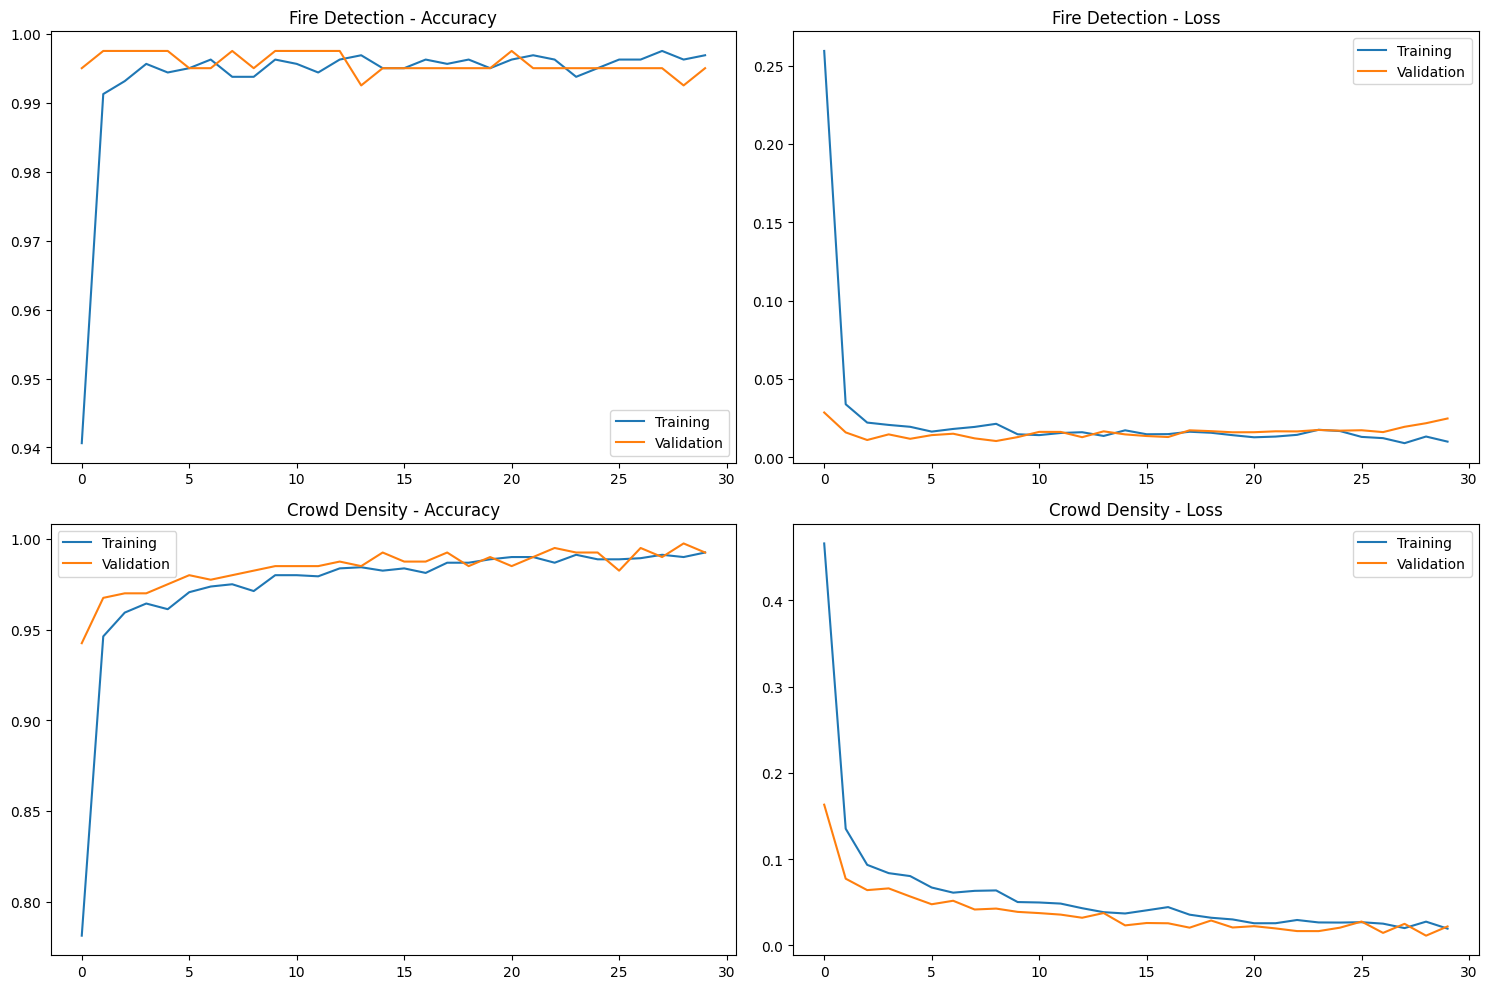


🎉 TRAINING COMPLETE!
🔥 Fire Detection Accuracy: 0.9950
👥 Crowd Density Accuracy: 0.9925
🚨 Behavior Analysis Accuracy: 0.9575

📁 Files ready for download:
- fire_detection_model.h5
- crowd_density_model.h5
- behavior_analysis_model.pkl
- behavior_label_encoder.pkl
- behavior_scaler.pkl
- fire_scaler.pkl
- crowd_scaler.pkl
- temperature_anomaly_model.pkl
- temperature_scaler.pkl
- humidity_anomaly_model.pkl
- humidity_scaler.pkl
- sound_anomaly_model.pkl
- sound_scaler.pkl
- motion_anomaly_model.pkl
- motion_scaler.pkl
- model_summary.json
- training_results.png

✅ Download all files and place them in your project's 'data/models/' directory.


In [7]:
# Create model summary and visualizations
model_summary = {
    "training_date": datetime.now().isoformat(),
    "models": {
        "fire_detection": {
            "type": "neural_network",
            "accuracy": float(fire_accuracy),
            "file": "fire_detection_model.h5"
        },
        "crowd_density": {
            "type": "neural_network",
            "accuracy": float(crowd_accuracy),
            "file": "crowd_density_model.h5"
        },
        "behavior_analysis": {
            "type": "random_forest",
            "accuracy": float(behavior_accuracy),
            "files": ["behavior_analysis_model.pkl", "behavior_label_encoder.pkl", "behavior_scaler.pkl"]
        },
        "anomaly_detection": {
            "type": "isolation_forest",
            "sensor_types": sensor_types,
            "files": [f"{sensor}_anomaly_model.pkl" for sensor in sensor_types] + [f"{sensor}_scaler.pkl" for sensor in sensor_types]
        }
    }
}

with open('/content/model_summary.json', 'w') as f:
    json.dump(model_summary, f, indent=2)

# Plot training results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fire model
axes[0, 0].plot(fire_history.history['accuracy'], label='Training')
axes[0, 0].plot(fire_history.history['val_accuracy'], label='Validation')
axes[0, 0].set_title('Fire Detection - Accuracy')
axes[0, 0].legend()

axes[0, 1].plot(fire_history.history['loss'], label='Training')
axes[0, 1].plot(fire_history.history['val_loss'], label='Validation')
axes[0, 1].set_title('Fire Detection - Loss')
axes[0, 1].legend()

# Crowd model
axes[1, 0].plot(crowd_history.history['accuracy'], label='Training')
axes[1, 0].plot(crowd_history.history['val_accuracy'], label='Validation')
axes[1, 0].set_title('Crowd Density - Accuracy')
axes[1, 0].legend()

axes[1, 1].plot(crowd_history.history['loss'], label='Training')
axes[1, 1].plot(crowd_history.history['val_loss'], label='Validation')
axes[1, 1].set_title('Crowd Density - Loss')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('/content/training_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*50)
print("🎉 TRAINING COMPLETE!")
print("="*50)
print(f"🔥 Fire Detection Accuracy: {fire_accuracy:.4f}")
print(f"👥 Crowd Density Accuracy: {crowd_accuracy:.4f}")
print(f"🚨 Behavior Analysis Accuracy: {behavior_accuracy:.4f}")
print("\n📁 Files ready for download:")
print("- fire_detection_model.h5")
print("- crowd_density_model.h5")
print("- behavior_analysis_model.pkl")
print("- behavior_label_encoder.pkl")
print("- behavior_scaler.pkl")
print("- fire_scaler.pkl")
print("- crowd_scaler.pkl")
for sensor in sensor_types:
    print(f"- {sensor}_anomaly_model.pkl")
    print(f"- {sensor}_scaler.pkl")
print("- model_summary.json")
print("- training_results.png")
print("\n✅ Download all files and place them in your project's 'data/models/' directory.")